Resources Used
- wget.download('https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py')
- Setup https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

https://google.github.io/mediapipe/solutions/pose_classification.html#colabs
https://fr.acervolima.com/detection-de-reperes-de-visage-et-de-main-a-l-aide-de-python-mediapipe-opencv/
https://medium.com/analytics-vidhya/human-pose-comparison-and-action-scoring-using-deep-learning-opencv-python-c2bdf0ddecba

https://github.com/gabguerin/hand-gesture-recognition-mediapipe

# 0. Setup Paths

In [1]:
import cv2
import mediapipe as mp

In [1]:
import  cv2
import pandas as pd
import numpy as np
import mediapipe as mp

mp_hands = mp.solutions.hands

class myClass:
    def __init__(self, val):
        self.val=val
    def getVal(self):
        return self.val  

def read_video(path):
    mp_hands = mp.solutions.hands
    cap = cv2.VideoCapture(path)

    #construct head of the dataframe
    title=['frame']
    for i in range(21):
        title.append(str(i)+'_x')
        title.append(str(i)+'_y')
    df = pd.DataFrame(columns=title)

    idx=0

    with mp_hands.Hands(
        model_complexity=0,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as hands:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty camera frame.")
                break

            # To improve performance, optionally mark the image as not writeable to pass by reference.
            image.flags.writeable = False
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hands.process(image)

            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            if results.multi_hand_landmarks:
                image_height, image_width, _ = image.shape

            if results.multi_hand_landmarks:
                L1=[]
                L1.append(idx)
                for i in range(21):
                    try :
                    #results.multi_handedness[0].classification[0].label
                        L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
                        L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
                    except:
                        L1.append(np.nan)
                        L1.append(np.nan)
                
                df_temp = pd.Series(L1, index = df.columns)
                df.loc[len(df)] = df_temp
                idx+=1
            
            pressedKey = cv2.waitKey(1) & 0xFF
            if pressedKey == ord("q"):  # Record pressing r
                break

    cap.release()
    return df



In [46]:
#   Main droite
# results.multi_hand_landmarks[0]

#hand_landmarks.landmark[1].x 
#results.multi_hand_landmarks[1]


In [ ]:
# results.multi_hand_landmarks[0]

# hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x


0.6501518487930298

Webcam with buffer

In [117]:
import cv2
import time
import mediapipe as mp
import collections
d = collections.deque(maxlen=30)

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For webcam input:
cap = cv2.VideoCapture(0)
previousTime = 0
currentTime = 0

title=['frame']
for i in range(21):
    title.append(str(i)+'_x')
    title.append(str(i)+'_y')
df = pd.DataFrame(columns=title)
idx=0


with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while True:#cap.isOpened():
        # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    if results.multi_hand_landmarks:
      image_height, image_width, _ = image.shape

    if results.multi_hand_landmarks:
      L1=[]
      L1.append(idx)
      for i in range(21):
          try :
          #results.multi_handedness[0].classification[0].label
              L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
              L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
          except:
              L1.append(np.nan)
              L1.append(np.nan)
              
    d.append(normlization(L1))
    idx+=1
    

    
    image=cv2.flip(image, 1)
    # Calculating the FPS
    currentTime = time.time()
    fps = 1 / (currentTime-previousTime)
    previousTime = currentTime
    # Displaying FPS on the image
    cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', image)

    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord("q"):  # Record pressing r
      cap.release()
      break


#print(d)



deque([[155, 547.5360107421875, 469.7170829772949, 579.0242385864258, 423.704195022583, 592.9799652099609, 372.0440483093262, 595.6681823730469, 326.42603874206543, 597.2806549072266, 290.04801750183105, 545.8318710327148, 328.61549377441406, 531.2910842895508, 251.26819610595703, 521.0309219360352, 208.13793182373047, 510.46165466308594, 176.62020206451416, 513.9071655273438, 334.18418884277344, 486.15283966064453, 248.0251121520996, 466.24061584472656, 200.8029842376709, 448.6736297607422, 165.42885303497314, 483.255615234375, 350.0973129272461, 453.8224411010742, 272.96791076660156, 434.58316802978516, 229.85731601715088, 419.92000579833984, 199.23869132995605, 454.1999053955078, 374.09568786621094, 423.1299591064453, 319.32506561279297, 403.7605285644531, 286.94838523864746, 387.0843505859375, 259.5435333251953], [156, 548.0356979370117, 469.3267822265625, 579.4887161254883, 423.2361602783203, 593.7017440795898, 372.10633277893066, 596.2978363037109, 326.45055770874023, 597.6013946

In [145]:
d = collections.deque(maxlen=3)
L1=[]

for i in range(50):
    L1=([i,i,i,i,i])
    d.append(L1)

d_2=np.array(d)
print(d_2)



[[47 47 47 47 47]
 [48 48 48 48 48]
 [49 49 49 49 49]]


In [110]:
import copy

def normlization(L1):
    L=copy.copy(L1)
    L=L[1:]
    x_base,y_base=0,0
    for i in range(0,len(L),2):
        if(i==0):
            x_base,y_base=L[0],L[1]
            L[0],L[1]=0,0
        else:
            L[i]=L[i]-x_base
            L[i+1]=L[i+1]-y_base
    return L

print(len(L1))
print(len(normlization(L1)))

42


IndexError: list index out of range

In [109]:
import cv2
import time
import mediapipe as mp
import collections
d = collections.deque(maxlen=30)

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For webcam input:
cap = cv2.VideoCapture(0)
previousTime = 0
currentTime = 0

seuil=-10000
buff_np=np.zeros([30,42])

title=['frame']
for i in range(21):
    title.append(str(i)+'_x')
    title.append(str(i)+'_y')
df = pd.DataFrame(columns=title)
idx=0


with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while True:#cap.isOpened():
        # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    if results.multi_hand_landmarks:
      image_height, image_width, _ = image.shape

    if results.multi_hand_landmarks:
      L1=[]
      L1.append(idx)
      for i in range(21):
          try :
          #results.multi_handedness[0].classification[0].label
              L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
              L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
          except:
              L1.append(np.nan)
              L1.append(np.nan)

    L1=normlization(L1)
    d.append(L1)
    buff_np = np.array(d)[:, 1:]
    #buff_np = np.array(d)

    idx+=1
    if (idx>30):
      resultats=[]
      for hmm_model_num in range(len(hmm_models)):
          res=hmm_models[hmm_model_num].score(np.array(buff_np))
          resultats.append(res)
      print(resultats)
      ide=resultats.index(max(resultats))
      print("Best model : ", classes[ide])
      # seuil=-20000
      # if (max(resultats) > seuil):
      #   ide=resultats.index(max(resultats))
      #   print("Best model : ", classes[ide])
      # else:
      #   print("No matching signs ")

    
    image=cv2.flip(image, 1)
    # Calculating the FPS
    currentTime = time.time()
    fps = 1 / (currentTime-previousTime)
    previousTime = currentTime
    # Displaying FPS on the image
    cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', image)

    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord("q"): 
      cap.release()
      break

#print(d)

[-80504.9511455521, -54198.14514652563]
Best model :  pouce
[-80324.48267929516, -54090.49027861802]
Best model :  pouce
[-80138.57984388155, -53978.42742115851]
Best model :  pouce
[-79957.28078739553, -53871.135448730885]
Best model :  pouce
[-79779.44582033723, -53766.526081461685]
Best model :  pouce
[-79603.7551443664, -53663.900820153365]
Best model :  pouce
[-79434.44098470028, -53567.66784486213]
Best model :  pouce
[-79259.90756037355, -53468.250208152196]
Best model :  pouce
[-79093.52418170919, -53376.180919817765]
Best model :  pouce
[-78929.87528930657, -53288.6506762137]
Best model :  pouce
[-78769.00044160351, -53203.84333038895]
Best model :  pouce
[-78608.33966280468, -53118.97838006382]
Best model :  pouce
[-78450.34244339592, -53036.73510160684]
Best model :  pouce
[-78295.96254792472, -52959.1326308676]
Best model :  pouce
[-78145.14641232834, -52884.89161422391]
Best model :  pouce
[-77993.13570953663, -52809.872829984546]
Best model :  pouce
[-77842.44084511504, -

In [ ]:

try :
    ax = results.multi_handedness[0].classification[0].label
    
except:
    print("z")

z


In [74]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import time
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
L=[0,0,0,0,0]

previousTime = 0
currentTime = 0

# For webcam input:
#cap = cv2.VideoCapture(0)

# For video on the laptop:
cap = cv2.VideoCapture(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\pouce\pouce_test.mp4')

title=['frame']
for i in range(21):
  title.append(str(i)+'_x')
  title.append(str(i)+'_y')
df = pd.DataFrame(columns=title)#['frame','x_r_hand','y_r_hand','x_l_hand','y_l_hand'])

idx,x=0,0
data=np.array([])

with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      break
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # if results.multi_hand_landmarks:
    #   L1=[]
    #   L1.append(idx)
    #   for i in range(21):
    #     try :
    #       #results.multi_handedness[0].classification[0].label
    #       L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
    #       L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
    #     except:
    #       L1.append(np.nan)
    #       L1.append(np.nan)
          
      # df_temp = pd.Series(L1, index = df.columns)
      # df.loc[len(df)] = df_temp
      # idx+=1
   
    if results.multi_hand_landmarks:
      image_height, image_width, _ = image.shape
      for hand_landmarks in results.multi_hand_landmarks:
   
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    image=cv2.flip(image, 1)
    # Calculating the FPS
    currentTime = time.time()
    fps = 1 / (currentTime-previousTime)
    previousTime = currentTime
    # Displaying FPS on the image
    cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', image)
    
    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord("q"):  # Record pressing r
      break

  cap.release()

Ignoring empty camera frame.


Test HMM

In [18]:
import glob
path = r'C:\Users\franc\Desktop\RT_Detection_AGV\data\train'
train_dir=[]

classes = next(os.walk( path) )
classes=classes[1]

for num_classes in range(len(classes)):
    train_dir.append(glob.glob(path+"\\"+classes[num_classes]))
print("path of the classes : ")
print(train_dir)

for gesture in range(len(train_dir)):
    for filename in glob.iglob(str(train_dir[gesture])[2:-2]+'\\\\*', recursive=True):
        print(filename)
        continue

path of the classes : 
[['C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\train\\five'], ['C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\train\\pouce']]
C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\train\\five\test3.mp4
C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\train\\pouce\pouce_train.mp4


Test download all the samples

In [32]:
for gesture in tqdm(range(len(train_dir))):
    for filename in glob.iglob(str(train_dir[gesture])[2:-2]+'\\\\*', recursive=True):
        print(filename)

100%|██████████| 2/2 [00:00<00:00, 903.17it/s]

C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\train\\five\test3.mp4
C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\train\\pouce\pouce_train.mp4


In [44]:
import numpy as np
from tqdm import tqdm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
train_arrays_lengths=[]
gestures_list=[]
list_gesture=[]

for gesture in tqdm(range(len(train_dir))):
    for filename in glob.iglob(str(train_dir[gesture])[2:-2]+'\\\\*', recursive=True):
        V=read_video(filename).to_numpy()
        continue
    V=V[:, 1:]
    print(V.shape)
    #V = np.expand_dims(V, axis = 0)
    list_gesture.append(V)
    train_arrays_lengths.append([V.shape[0]])
    
train_arrays= np.array(list_gesture, dtype=object)

print(train_arrays.shape)
print(train_arrays_lengths)

 50%|█████     | 1/2 [00:44<00:44, 44.58s/it]

Ignoring empty camera frame.
(995, 42)


100%|██████████| 2/2 [01:32<00:00, 46.46s/it]

Ignoring empty camera frame.
(945, 42)
(2,)
[[995], [945]]


In [43]:
print(train_arrays.shape)

(0,)


In [39]:
#To save as pinkle
import pickle
file_name = "save_train_data.pkl"
train_arrays=np.array([])

open_file = open(file_name, "wb")
pickle.dump(train_arrays, open_file)
open_file.close()

In [40]:
#To read pinkle file
import pickle
file_name = "save_train_data.pkl"

open_file = open(file_name, "rb")
train_arrays = pickle.load(open_file)
open_file.close()

In [23]:
train_arrays.shape[0]

0

In [45]:
train_arrays.shape[0]

2

In [58]:
train_arrays_lengths_test=[]

for i in range(train_arrays.shape[0]):
    tmp=[]
    ok=0
    for j in range(int(train_arrays[i].shape[0]/30)):
        tmp.append(30)
    tmp.append(train_arrays[i].shape[0] - (j+1)*30)
    print(tmp)
    train_arrays_lengths_test.append(tmp)

print(train_arrays_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 5]
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 15]
[[995], [945]]


Read video for testing

In [33]:
path = r'C:\Users\franc\Desktop\RT_Detection_AGV\data\test'
test_dir=[]

classes = next(os.walk( path) )
classes=classes[1]

for num_classes in range(len(classes)):
    test_dir.append(glob.glob(path+"\\"+classes[num_classes]))
test_dir

for gesture in range(len(test_dir)):
    for filename in glob.iglob(str(test_dir[gesture])[2:-2]+'\\\\*', recursive=True):
        print(filename)
        V=read_video(filename).to_numpy()
        continue
    if 'test' in str(test_dir[gesture]): 
        V=V[:35, 1:]
    V = np.expand_dims(V, axis = 0)
    if(gesture==0): test_arrays=V
    else: test_arrays = np.append(test_arrays, V, axis=0)

print(test_arrays.shape)

C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\test\\five\test1.mp4
Ignoring empty camera frame.
C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\test\\pouce\pouce_test.mp4
Ignoring empty camera frame.
(2, 35, 42)


In [59]:

from hmmlearn.hmm import GaussianHMM 
import numpy as np
import glob
import tqdm
import os
from sklearn.metrics import confusion_matrix

states = 6
cov_type = 'spherical'
n_iter = 10000
tol=0.000001
algorithm ='viterbi' 
hmm_models=[]

for hmm_model_num in tqdm.tqdm(range(len(train_arrays))):
    model1=GaussianHMM(n_components=int(states), covariance_type=str(cov_type),n_iter = n_iter, tol =tol,algorithm=algorithm,
                       verbose=False, params="stmc").fit(train_arrays[hmm_model_num],train_arrays_lengths[hmm_model_num]) #7
    hmm_models.append(model1)

# for hmm_model_num in tqdm.tqdm(range(len(train_arrays))):
#     model1=GaussianHMM(n_components=int(states), covariance_type=str(cov_type),algorithm=algorithm,
#                        verbose=False, params="stmc").fit(train_arrays[hmm_model_num][1:],train_arrays_lengths[hmm_model_num]) #7
#     hmm_models.append(model1)

100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


In [30]:
for sample in range(len(test_dir)):
    #test_arrays[sample]
    print(test_arrays[sample].shape)

(35, 42)
(35, 42)


In [61]:
for sample in range(len(test_dir)):
    resultats=[]
    for hmm_model_num in range(len(hmm_models)):
        res=hmm_models[hmm_model_num].score(test_arrays[sample][:30])
        resultats.append(res)
    print(resultats)
    ide=resultats.index(max(resultats))
    print("Sample : ", str(test_dir[sample])[-7:-2], "|| Best model : ", classes[ide])

[-8265.090951584962, -12579.5503454981]
Sample :  \five || Best model :  five
[-10571.66885822954, -6713.907245069906]
Sample :  pouce || Best model :  pouce


Test GMM

In [89]:
train_arrays[0].shape[0]+train_arrays[1].shape[0]

1940

In [99]:
T=T.flatten(order='A')
T=np.ravel(T)
T.shape

(2,)

In [91]:
T=train_arrays
print(T.shape)
T.reshape(train_arrays[0].shape[0]+train_arrays[1].shape[0],42)

(2,)


ValueError: cannot reshape array of size 2 into shape (1940,42)

In [84]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2).fit(test_arrays)

#plt.scatter(X[:, 0], X[:, 1], c=classes, s=40, cmap='viridis')

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
probs = gmm.predict_proba(test_arrays)

In [32]:
#from data import Data

train_df_five=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\five\test3.mp4')
test_df_five=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\five\test1.mp4')

train_df_pouce=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\pouce\pouce_train.mp4')
test_df_pouce=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\pouce\pouce_test.mp4')

print(train_df_five.shape)
print(test_df_five.shape)
print(train_df_pouce.shape)
print(test_df_pouce.shape)

Ignoring empty camera frame.
Ignoring empty camera frame.
Ignoring empty camera frame.
Ignoring empty camera frame.
(995, 43)
(44, 43)
(945, 43)
(39, 43)


In [56]:
train_arrays=train_df_five.to_numpy()
train_arrays=train_arrays[:900, :]
#lenght of each sample
train_arrays_lengths=[100,100,100,100,100,100,100,100,100]
print(train_arrays.shape)
print(len(train_arrays_lengths))
print(train_arrays_lengths)



(900, 43)
9
[100, 100, 100, 100, 100, 100, 100, 100, 100]


In [57]:
train_arrays = np.expand_dims(train_arrays, axis = 0)
train_arrays[0].shape

(900, 43)

In [60]:
train_arrays22=train_df_pouce.to_numpy()

train_arrays22=train_arrays22[:900, :]
#lenght of each sample
train_arrays_lengths22=[100,100,100,100,100,100,100,100,100]
print(train_arrays22.shape)
print(len(train_arrays_lengths22))
print(train_arrays_lengths22)

train_arrays22 = np.expand_dims(train_arrays22, axis = 0)

(900, 43)
9
[100, 100, 100, 100, 100, 100, 100, 100, 100]


In [61]:
train_arrays = np.append(train_arrays, train_arrays22, axis=0)

In [65]:
train_arrays[1].shape

(900, 43)

In [67]:

train_arrays_lengths=[train_arrays_lengths,train_arrays_lengths22]

In [170]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import time
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
L=[0,0,0,0,0]

previousTime = 0
currentTime = 0

# For webcam input:
#cap = cv2.VideoCapture(0)

# For video on the laptop:
cap = cv2.VideoCapture(r'C:\Users\franc\Desktop\test1.mp4')

title=['frame']
for i in range(21):
  title.append(str(i)+'_x')
  title.append(str(i)+'_y')
df1 = pd.DataFrame(columns=title)#['frame','x_r_hand','y_r_hand','x_l_hand','y_l_hand'])

idx,x=0,0
data=np.array([])

with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      break
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #print("results.multi_hand_landmarks",results.multi_hand_landmarks)
    #print("results.multi_handedness",results.multi_handedness)

    if results.multi_hand_landmarks:
      L1=[]
      L1.append(idx)
      for i in range(21):
        try :
          #results.multi_handedness[0].classification[0].label
          L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
          L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
        except:
          L1.append(np.nan)
          L1.append(np.nan)

        # try :
        #   #results.multi_handedness[0].classification[0].label
        #   L1.append(results.multi_hand_landmarks[1].landmark[i].x * image_width )
        #   L1.append(results.multi_hand_landmarks[1].landmark[i].y * image_height)
        # except:
        #   L1.append(np.nan)
        #   L1.append(np.nan)
      #print(L1)
      df_temp = pd.Series(L1, index = df.columns)
      df1.loc[len(df1)] = df_temp
      idx+=1
   
    if results.multi_hand_landmarks:
      image_height, image_width, _ = image.shape
      for hand_landmarks in results.multi_hand_landmarks:
      #   L.append(hand_landmarks)
      #   print(len(hand_landmarks.landmark))
      #   print(
      #     f'Index finger tip coordinates: (',
      #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
      #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      # )
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    image=cv2.flip(image, 1)
    # Calculating the FPS
    currentTime = time.time()
    fps = 1 / (currentTime-previousTime)
    previousTime = currentTime
    # Displaying FPS on the image
    cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', image)
    
    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord("q"):  # Record pressing r
      break

cap.release()

Ignoring empty camera frame.


In [131]:
#df

In [171]:
#df=df[['x_r_hand','y_r_hand']]    
data=df.to_numpy()

#data=data[30:34,1:]
data=data[:,1:]
print(data.shape)


(44, 42)


GMM

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
# Generate some data
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting


In [78]:
X.shape

(400, 2)

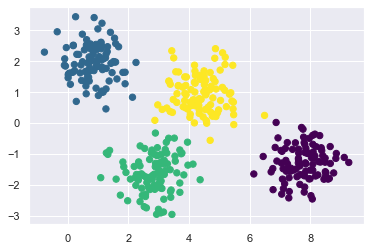

In [80]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [79]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.469 0.    0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]
